# BLOB extraction

![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

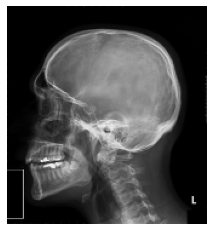

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()





In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/f/fe/Masson%27s_trichrome_staining_on_rat%27s_trachea.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
im.shape

(1046, 1005)

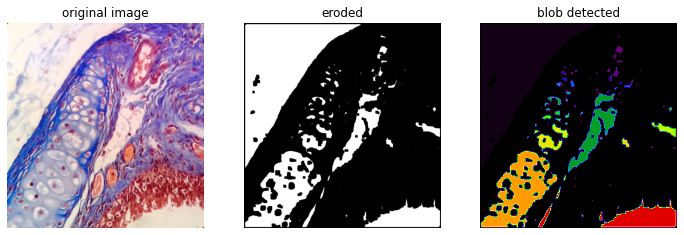

In [ ]:
from skimage.filters import threshold_otsu
from scipy import ndimage
image = im
thresh = threshold_otsu(image)
binary = image > thresh
eroded = ndimage.binary_erosion(binary, structure=np.ones((12,12)))
from skimage import measure
all_labels = measure.label(eroded)


fig, axes = plt.subplots(ncols=3,  sharex=True, sharey=True,
                         figsize=(12,4))

axes[0].imshow(a)
axes[0].set_title('original image')

axes[1].imshow(eroded, cmap=plt.cm.gray)
axes[1].set_title('eroded')

axes[2].imshow(all_labels, cmap=plt.cm.nipy_spectral)
axes[2].set_title('blob detected')

for ax in axes:
    ax.axis('off')

In [ ]:
url = "https://images.unsplash.com/photo-1597484389225-c68a9f0fa106?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=447&q=80"
a = io.imread(url)
image = color.rgb2gray(a)
thresh = threshold_otsu(image)
binary = image > thresh
closed = ndimage.binary_closing(binary, structure=np.ones((12,12)))
from skimage.feature import blob_dog, blob_log, blob_doh
blobs_log = blob_log(closed, max_sigma=30, num_sigma=10, threshold=.1)
blobs_dog = blob_dog(closed, max_sigma=30, threshold=.1)
blobs_doh = blob_doh(closed, max_sigma=30, threshold=.01)





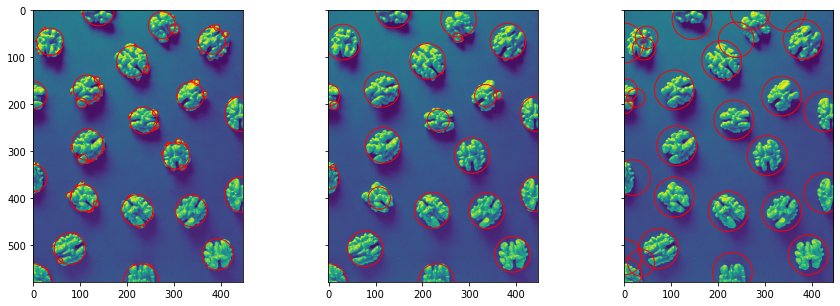

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image)
for blob in blobs_log:
    y, x, area = blob
    ax[0].add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))
ax[1].imshow(image)
for blob in blobs_dog:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))

ax[2].imshow(image)
for blob in blobs_doh:
    y, x, area = blob
    ax[2].add_patch(plt.Circle((x, y), area*np.sqrt(2),
                 color='r', fill=False))

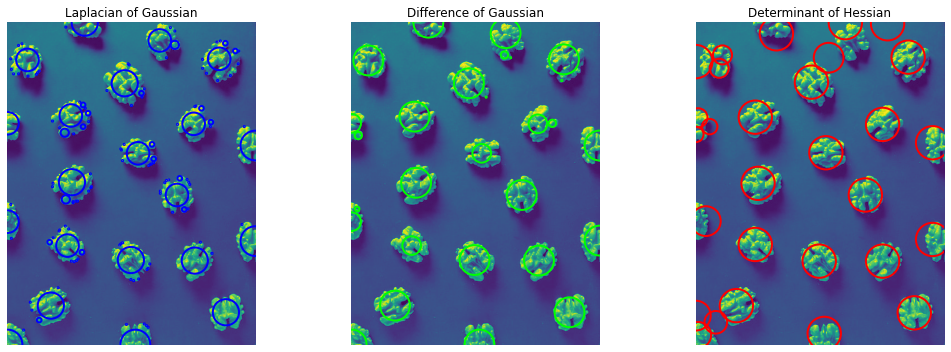

In [ ]:
blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['blue', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  if __name__ == '__main__':


(-0.5, 705.5, 612.5, -0.5)

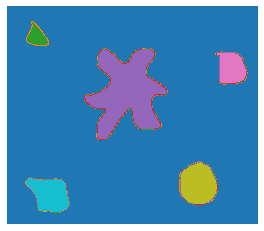

In [ ]:
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table


url = "https://github.com/SalvatoreRa/tutorial/blob/main/images/blobs.png?raw=true"
a = io.imread(url)
im = color.rgb2gray(a)

thresh = threshold_otsu(im)
binary = im > thresh

blobs = measure.label(binary > 0)
plt.imshow(blobs, cmap = 'tab10')
plt.axis('off')




In [ ]:
import pandas as pd
properties =['area','bbox','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length',
             'eccentricity']
df = pd.DataFrame(regionprops_table(blobs, properties = properties))
df

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,2778,41,53,112,119,2993,4686,73.519221,54.114760,0.676913
1,33315,119,217,377,452,48906,60630,256.355949,207.834536,0.585425
2,6287,125,587,220,676,6821,8455,101.363289,82.671669,0.578619
3,10294,437,485,558,592,10443,12947,121.191402,108.604698,0.443768
4,8659,482,53,580,176,9485,12054,126.912057,92.760497,0.682481


100%|██████████| 5/5 [00:00<00:00, 1192.11it/s]


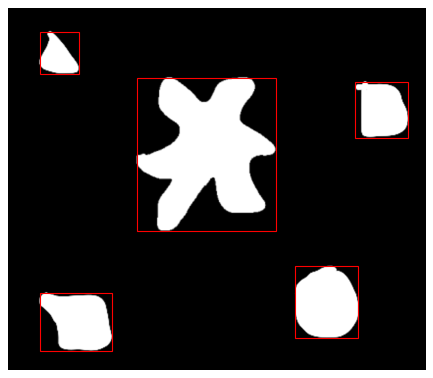

In [ ]:
from tqdm import tqdm
from matplotlib.patches import Rectangle
blob_coordinates = [(row['bbox-0'],row['bbox-1'],
                     row['bbox-2'],row['bbox-3'] )for
                    index, row in df.iterrows()]
fig, ax = plt.subplots(1,1, figsize=(8, 6), dpi = 80)
for blob in tqdm(blob_coordinates):
    width = blob[3] - blob[1]
    height = blob[2] - blob[0]
    patch = Rectangle((blob[1],blob[0]), width, height,
                       edgecolor='r', facecolor='none')
    ax.add_patch(patch)
ax.imshow(im, cmap="gray");
ax.set_axis_off()


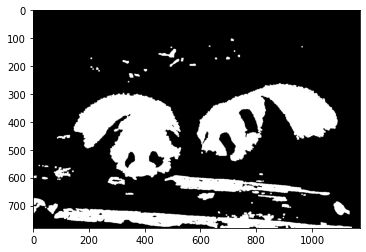

In [ ]:
url = "https://images.unsplash.com/photo-1540126034813-121bf29033d2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1172&q=80"

a = io.imread(url)

im = color.rgb2gray(a)

image = im
thresh = threshold_otsu(image)
binary = image > thresh
opening = ndimage.binary_opening(binary, structure=np.ones((5,5)))

plt.imshow(opening, cmap= "gray")

(-0.5, 1171.5, 779.5, -0.5)

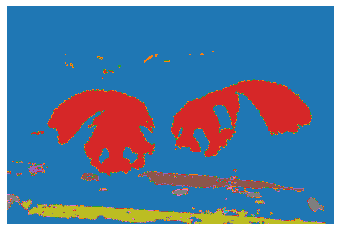

In [ ]:
blobs = measure.label(opening > 0)
plt.imshow(blobs, cmap = 'tab10')
plt.axis('off')

In [ ]:
import pandas as pd
properties =['area','bbox','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length',
             'eccentricity']
df = pd.DataFrame(regionprops_table(blobs, properties = properties))
df.sort_values('area', ascending= False)

,area,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
23,70445,296,146,608,531,88402,120120,380.914525,283.269696,0.668562
22,66734,262,587,541,1092,97076,140895,568.865184,228.767108,0.915575
56,34088,709,76,780,1143,49472,75757,1071.051483,47.897455,0.999000
33,16468,591,472,663,1064,21213,42624,571.399705,43.368781,0.997115
50,1645,685,1077,734,1135,1858,2842,62.981497,36.742650,0.812194
...,...,...,...,...,...,...,...,...,...,...
26,25,554,20,559,25,25,25,5.656854,5.656854,0.000000
40,25,610,822,615,827,25,25,5.656854,5.656854,0.000000
16,25,209,213,214,218,25,25,5.656854,5.656854,0.000000
37,25,603,87,608,92,25,25,5.656854,5.656854,0.000000


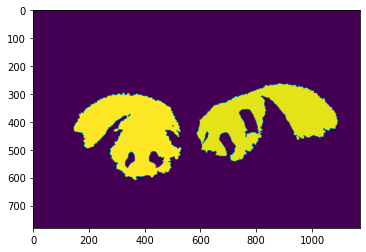

In [ ]:
b = np.where((blobs == 24)|(blobs == 23), blobs, 0)
plt.imshow(b)